In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [10]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


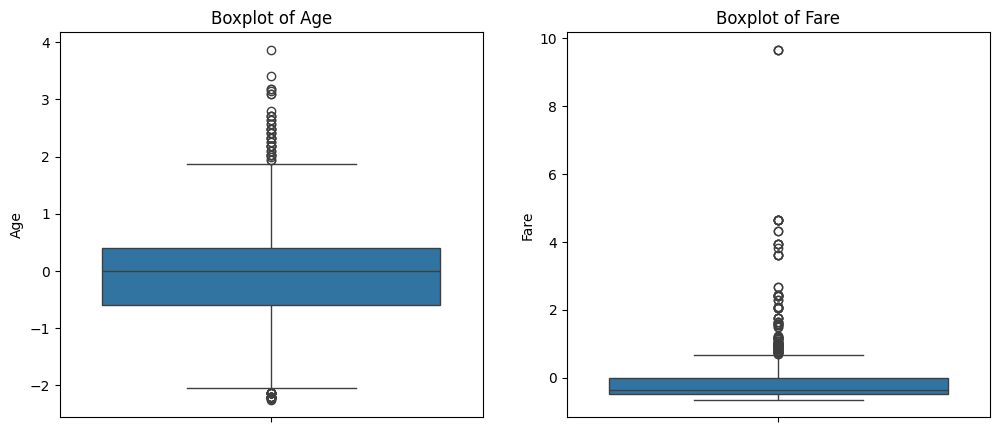

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.show()


In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')


In [14]:
print(f'Rows and columns after outlier removal: {df.shape}')


Rows and columns after outlier removal: (718, 10)


In [18]:
df.to_csv('Titanic-Cleaned.csv', index=False)
